# Story Telling - Capstone 1

This notebook combines Data Visualization and Statistical Inference. I will plot the distribution and perform statistical tests for each feature to find out the statistical relationship with the target variable.

### Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
from scipy.stats import t, norm, chi2_contingency, chi2
from IPython.display import display
from IPython import get_ipython

my_variables = set(dir())
%matplotlib inline
pd.options.display.max_columns = None
sns.set_style("whitegrid")

In [99]:
# read in master table generated in Data Wrangling step
master = pd.read_csv('../data/master.csv')
master.drop('Unnamed: 0',axis=1,inplace=True)
master.columns

Index(['SUBJECT_ID', 'HADM_ID', 'READMISSION_30DAYS', 'DISCHARGE_LOCATION',
       'INSURANCE', 'MARITAL_STATUS', 'GENDER', 'AGE', 'ETHNICITY_GRP',
       'CURR_SERVICE', 'TEXT_CL', 'AGE_boxcox_lambda_opt', 'NUM_PRESCRIPTION',
       'LOS', 'HLOS_CL', 'LOS_RATIO', 'KD', 'HP', 'PUL', 'UT', 'HIV', 'DB',
       'MBD', 'TB', 'GA', 'HM', 'HEP', 'HO', 'FR', 'TX', 'LA', 'AF', 'CB',
       'PNE', 'HF', 'SP', 'WMCC', 'WCC', 'WOCCMCC', 'WOMCC', 'WCCMCC',
       'DRG_SEVERITY', 'DRG_MORTALITY', 'TEXT', 'NUM_PRESCRIPTION_LOG',
       'LOS_LOG', 'LOS_boxcox_lambda_opt', 'HLOS_CL_LOG',
       'HLOS_CL_boxcox_lambda_opt', 'LOS_RATIO_LOG',
       'LOS_RATIO_boxcox_lambda_opt'],
      dtype='object')

### Define functions

In [33]:
# function that generates postive and negative observations
def generate_pop(dataset, column, target_var, target):
    return dataset.loc[dataset[target_var] == target, column]

In [34]:
# function that plots historgrams of a given variable for two populations
def plot_hist(dataset, column, target_var, pop1_color, pop2_color, title, xlabel, ylabel, pop1legend, pop2legend):
    pop1 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=1)
    pop2 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=0)

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.distplot(pop1, color=pop1_color, label=pop1legend)
    sns.distplot(pop2, color=pop2_color, label=pop2legend)
    ax.set(title=title,
           xlabel=xlabel, ylabel=ylabel)
    ax.margins(0.05)

    plt.legend()
    plt.show()

In [140]:
# function that make a violin plot
def plot_violin(dataset, yvar, xvar, target, color): 
    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    ax = sns.violinplot(x=xvar, y=yvar, hue=target, data=dataset, 
                        palette=color, split=True, scale='count', showmedian=True)
    l = ax.legend(loc=0, title='Readmission<30days', borderaxespad=0.)

In [36]:
# function that prints mean, median and std
def print_stats(dataset, column, target_var, pop1label, pop2label):
    pop1 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=1)
    pop2 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=0)
    print('{} for {}: mean={}, median={}, std={}'
          .format(column, pop1label, round(np.mean(pop1), 2), round(np.median(pop1), 2), round(np.std(pop1), 2)))
    print('{} for {}: mean={}, median={}, std={}'
          .format(column, pop2label, round(np.mean(pop2), 2), round(np.median(pop2), 2), round(np.std(pop2), 2)))

In [37]:
# function that perform and return student t-test results
def ttest(dataset, column, target_var, same_var):
    pop1 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=1)
    pop2 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=0)

    return ss.ttest_ind_from_stats(np.mean(pop1), np.std(pop1), len(pop1),
                            np.mean(pop2), np.std(pop2), len(pop2), equal_var=same_var)

In [38]:
# function to calculate critical value base on the desired confidence level
def critical_value(confidence_level,dataset,column,target_var):
    pop1 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=1)
    pop2 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=0)
    p = confidence_level
    df = len(pop1)+len(pop2)-1
    # retrieve value <= probability
    value = t.ppf(p, df)
    print('critical value: ',value)

In [39]:
# define function to test whether 2 population have equal variances
def equal_var_test(dataset, column, target_var):
    pop1 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=1)
    pop2 = generate_pop(dataset=dataset, column=column, target_var=target_var, target=0)
    return ss.levene(pop1,pop2)

### Is Age different between the two groups?

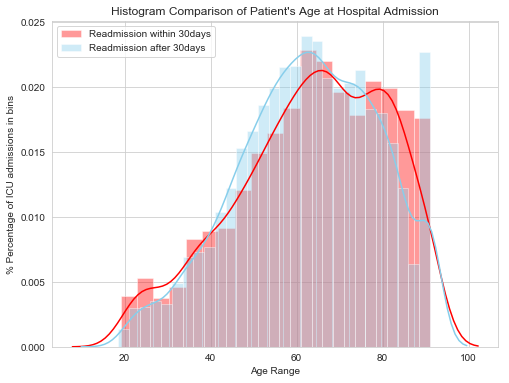

In [40]:
# plot Age distribution
plot_hist(dataset=master,
          column='AGE',
          target_var='READMISSION_30DAYS',
          pop1_color='red',
          pop2_color='skyblue',
          title='Histogram Comparison of Patient\'s Age at Hospital Admission',
          xlabel='Age Range',
          ylabel='% Percentage of ICU admissions in bins',
          pop1legend="Readmission within 30days",
          pop2legend="Readmission after 30days")

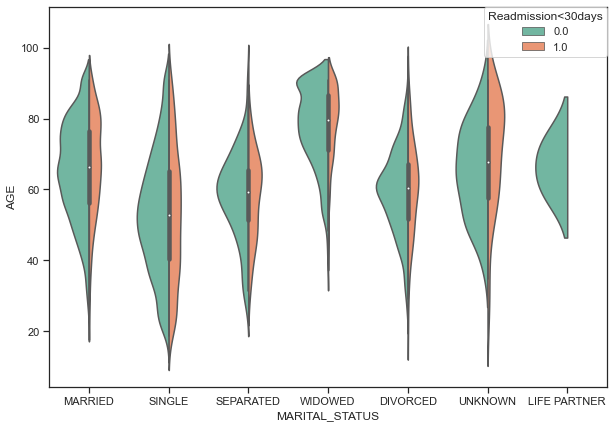

In [125]:
# plot Age vs. other feature colored by target var in a violinplot
plot_violin(dataset=master,xvar='MARITAL_STATUS',yvar='AGE',target='READMISSION_30DAYS',color='Set2')

In [42]:
print_stats(dataset=master,
            column='AGE',
            target_var='READMISSION_30DAYS', 
            pop1label="Readmission within 30 days", 
            pop2label="Readmission after 30 days")

AGE for Readmission within 30 days: mean=63.51, median=65.28, std=17.51
AGE for Readmission after 30 days: mean=62.75, median=63.36, std=16.34


In [43]:
# perform levene test to check whether the variance of the two groups are equal
equal_var_test(dataset=master,
               column='AGE',
               target_var='READMISSION_30DAYS')
# perform levene test to check whether the variance of the two groups are equal
equal_var_test(dataset=master,
               column='AGE',
               target_var='READMISSION_30DAYS')
# perform t test to check if the difference between the mean Age of the two groups are statistically significant
ttest(dataset=master, column='AGE', target_var='READMISSION_30DAYS', same_var=True)

Ttest_indResult(statistic=1.8561790405147995, pvalue=0.06346343161456389)

In [44]:
# perform t test to check if the difference between the mean Age of the two groups are statistically significant
ttest(dataset=master, column='AGE', target_var='READMISSION_30DAYS', same_var=True)

Ttest_indResult(statistic=1.8561790405147995, pvalue=0.06346343161456389)

In [45]:
# p-value threshold is chosen to be 0.05 i.e. 95% confidence interval
critical_value(confidence_level=0.95,
               dataset=master,
               column='AGE',
               target_var='READMISSION_30DAYS')

critical value:  1.6450370794766227


Mean Age between the two groups are not statistically significantly different because the t-statistics is smaller than the critical value (1.56 < 1.65) and p-value is greater than threshold (0.12 > 0.05). 

### Is the mean Number of Prescriptions different between the two groups?

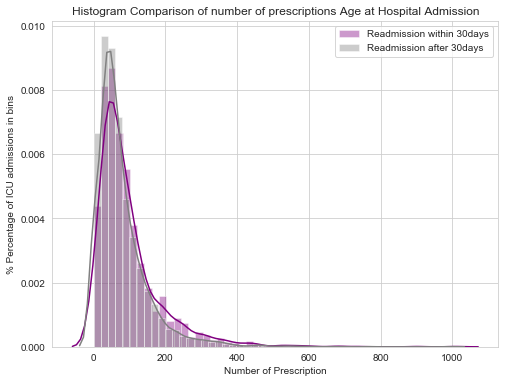

In [46]:
# plot Number of Prescription distribution
plot_hist(dataset=master,
          column='NUM_PRESCRIPTION',
          target_var='READMISSION_30DAYS',
          pop1_color='purple',
          pop2_color='grey',
          title='Histogram Comparison of number of prescriptions Age at Hospital Admission',
          xlabel='Number of Prescription',
          ylabel='% Percentage of ICU admissions in bins',
          pop1legend='Readmission within 30days',
          pop2legend='Readmission after 30days')

In [123]:
master.loc[master['MARITAL_STATUS']=='MARRIED','NUM_PRESCRIPTION']

0        26.0
1        89.0
3        84.0
4        55.0
6        14.0
        ...  
8303     59.0
8304     34.0
8305     27.0
8306    107.0
8307     79.0
Name: NUM_PRESCRIPTION, Length: 3600, dtype: float64

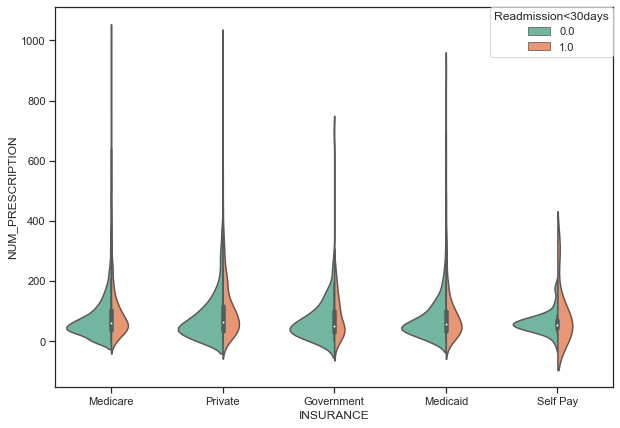

In [141]:
# plot number of prescription violinplot
#sns.violinplot(y='NUM_PRESCRIPTION', x='READMISSION_30DAYS',data=master,palette="coolwarm",hue='READMISSION_30DAYS')
# plot Age vs. other feature colored by target var in a violinplot
plot_violin(dataset=master,xvar='INSURANCE',yvar='NUM_PRESCRIPTION',target='READMISSION_30DAYS',color='Set2')

In [49]:
# perform levene test to check whether the variance of the two groups are equal
equal_var_test(dataset=master,
               column='NUM_PRESCRIPTION',
               target_var='READMISSION_30DAYS')

LeveneResult(statistic=45.780115224564, pvalue=1.4126579998710224e-11)

In [50]:
# perform t test to check if the difference between the mean Age of the two groups are statistically significant
ttest(dataset=master, column='NUM_PRESCRIPTION', target_var='READMISSION_30DAYS', same_var=True)

Ttest_indResult(statistic=9.88880613830782, pvalue=6.230451064880207e-23)

In [51]:
# p-value threshold is chosen to be 0.05 i.e. 95% confidence interval
critical_value(confidence_level=0.95,
               dataset=master,
               column='NUM_PRESCRIPTION',
               target_var='READMISSION_30DAYS')

critical value:  1.6450370794766227


Mean number of prescriptions issued is statistically significantly different between the two populations because the pvalue is much smaller than threshold (9.25e-24<<0.05) and the test-statistics is much larger than the critical value (10.08>>1.65)

### Is the mean Length of Stay in ICU Ratio (as a percentage of total hospital stay in days) different between the two groups?

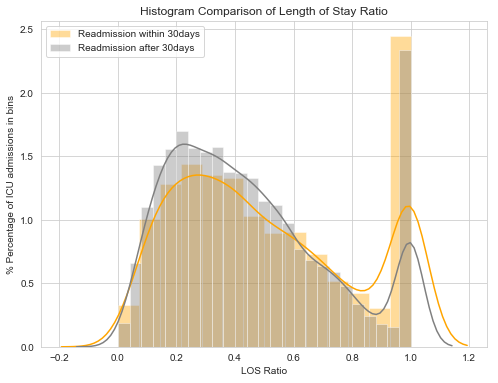

In [52]:
# plot LOS Ratio distribution
plot_hist(dataset=master,
          column='LOS_RATIO',
          target_var='READMISSION_30DAYS',
          pop1_color='orange',
          pop2_color='grey',
          title='Histogram Comparison of Length of Stay Ratio',
          xlabel='LOS Ratio',
          ylabel='% Percentage of ICU admissions in bins',
          pop1legend='Readmission within 30days',
          pop2legend='Readmission after 30days')

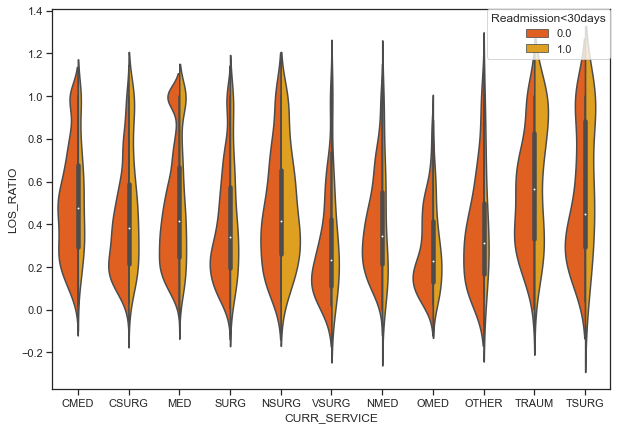

In [139]:
# plot number of prescription violinplot
plot_violin(dataset=master,xvar='CURR_SERVICE',yvar='LOS_RATIO',target='READMISSION_30DAYS',color='autumn')

In [54]:
# perform levene test to check whether the variance of the two groups are equal
equal_var_test(dataset=master,
               column='LOS_RATIO',
               target_var='READMISSION_30DAYS')

LeveneResult(statistic=78.17464684534565, pvalue=1.1376785760326017e-18)

In [55]:
# perform t test to check if the difference between the mean Age of the two groups are statistically significant
ttest(dataset=master, column='LOS_RATIO', target_var='READMISSION_30DAYS', same_var=True)

Ttest_indResult(statistic=8.948660386051587, pvalue=4.379737716849273e-19)

In [56]:
# p-value threshold is chosen to be 0.05 i.e. 95% confidence interval
critical_value(confidence_level=0.95,
               dataset=master,
               column='LOS_RATIO',
               target_var='READMISSION_30DAYS')

critical value:  1.6450370794766227


Mean number of length of stay in ICU as a percentage of total length of stay in hospital per admission is statistically significantly different because the p-value is much smaller than threshold (9.64e-22<<0.05) and the test-statistics is much bigger than the critical value (9.61>>1.65).

### DIAGNOSIS @ DISCHARGE

In [57]:
# create df that only contains target and diagnosis in preparation for performing chi-square tests
df_chi = master[['READMISSION_30DAYS', 'HF', 'KD', 'HP', 'PUL', 'UT', 'HIV', 'DB',
              'MBD', 'TB', 'GA', 'HM', 'HEP', 'HO', 'FR', 'TX', 'LA', 'AF', 'CB', 'PNE', 'SP']]
# set confidence level to 95%
prob = 0.95
alpha = 1.0 - prob
diag = ['HM', 'PUL', 'UT', 'DB', 'HO', 'FR', 'AF', 'PNE', 'HF', 'KD',
        'HP', 'MBD', 'TB', 'GA', 'HIV', 'HEP', 'TX', 'LA', 'CB', 'SP']
df_diag = pd.DataFrame(diag)
df_diag.columns = ['Diagnosis']
# calculate chi2-statistics and p-values for each diagnosis by looping over the list of 20 diagnosis binary variable
for d in diag:
    table = pd.crosstab(df_chi[d], df_chi["READMISSION_30DAYS"])
    stat, p, dof, expected = chi2_contingency(table)
    df_diag.loc[df_diag.Diagnosis == d, 'Chi2_Statistics'] = round(stat, 3)
    df_diag.loc[df_diag.Diagnosis == d, 'p-value'] = round(p, 3)
df_diag.sort_values('p-value').reset_index()

,index,Diagnosis,Chi2_Statistics,p-value
0,0,HM,27.082,0.000
1,5,FR,21.075,0.000
2,6,AF,15.628,0.000
3,7,PNE,14.433,0.000
4,3,DB,9.583,0.002
5,4,HO,7.154,0.007
6,2,UT,6.910,0.009
7,1,PUL,4.106,0.043
8,14,HIV,3.422,0.064
9,17,LA,2.007,0.157


The top 9 diagnoses have p-values smaller or close to threshold 0.05 (I include HIV because its p-value is only slightly above threshold; threshold should be use as guidance not an absolute rule), these diagnoses are concluded to have a statistically significant relationship with the target.
I will try including only these 9 diagnoses in the model instead of all 20 and see if whether model performance increase. 

In [58]:
# clean up at the end by deleting all variables cached in memory
my_variables = list(set(dir()) - my_variables)
get_ipython().magic('%reset_selective -f [{}]'.format(','.join(my_variables)))